# Uso adecuado de graficos

### VISUALIZACIONES UNIVARIADAS

Graficos de Barras (Cuantitativo, cantidades, )
- Priorizar un buen titulo
- Todo en ingles o todo en espa;ol
- Sin cuadricula abajo
- Escala 0 20 40 es mejor que 0 5 10 15 20 25, respetarla
- Tamanio de la letra
- Evaluar colores
- leyenda adentro del grafico para achicar el espacio
- No es aconsejable el 3d
- No es aconsejable usar graficos de barra si queres mostrar algo que pasa en el tiempo, a no ser que sea la acumulada de ventas
- 

In [7]:
import pandas as pd #manipulacion de datos
from datetime import datetime, timedelta #formatear fechas
from matplotlib import pyplot as plt #dibujos
from matplotlib import dates as mpl_dates #dibujos
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #graficos en 3d

In [6]:
# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

INFORMACION PARA PREDECIR si la persona sobrevivio o no en base al sexo, la clase, etc

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/ven-27/datasets/master/titanic.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Valores unicos de la columna
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [6]:
#cuantas apariciones hay en cada columna
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
#cuantas apariciones hay en cada columna
df.Sex.value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

ABC DEL DATASET
DESCRIBE, SHAPE, INFO, HEAD(), CORR()

In [10]:
#Apariciones de la clase 1, de la clase 2, etc
df_n=df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).count().reset_index()
df_n.head()

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108


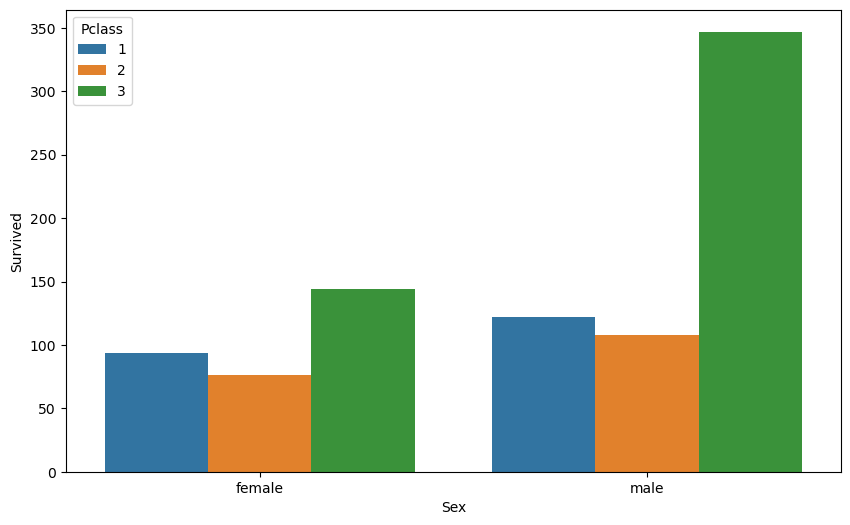

In [11]:
import seaborn as sns
plt.figure(figsize=(10,6)) #tamanio del lienzo
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df_n); #df_n le paso la agrupacion --> sumarixacion (sumo el contenido)

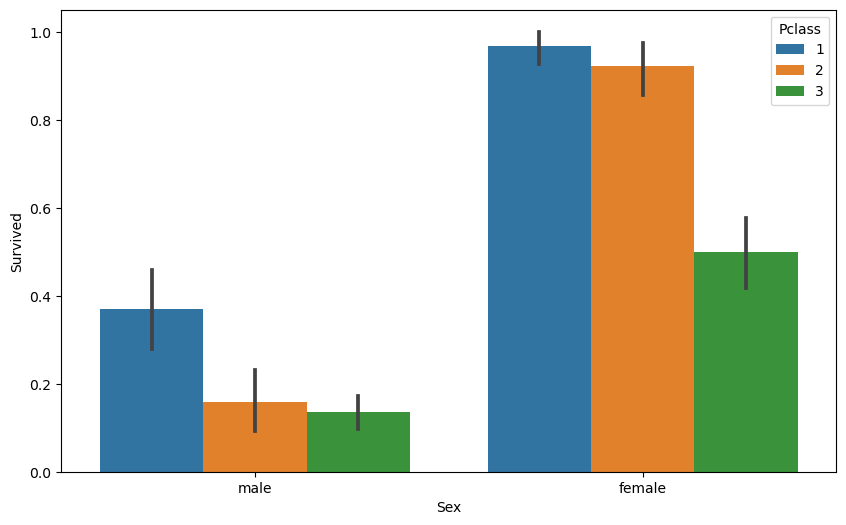

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6)) #tamanio del lienzo
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=df); #recuento 

In [19]:
df_x=df[['Survived','Pclass']].groupby(by=['Pclass']).count()
df_x.head()  
#aca tenfo corridos los indices y para graficar es un lio entonces tengo que resetearlos

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
#recuento
df_x=df[['Survived','Pclass']].groupby(by=['Pclass']).count().reset_index() #aca me dice de cada clase cuantos sobrevivieorn
df_x['Pclass']=df_x['Pclass'].astype('str')
df_x.head()


,Pclass,Survived
0,1,216
1,2,184
2,3,491


### Bokeh a diferencia de las demas es interactiva

In [21]:
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.embed import file_html
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file

Loading BokehJS ...

In [30]:
#manera de grafico se pueda ver
output_notebook()

#declaracion de datos
source = ColumnDataSource(data=dict(Pclass=df_x.Pclass, counts=df_x.Survived, color=Spectral6))

#genero el lienzo
p = figure(x_range=df_x.Pclass, height=250, title="Clases involucradas")

#genero el grafico vbar tipo de grafico
p.vbar(x='Pclass', top='counts', width=0.9, color='color', legend_label="Pclass", source=source)

#borra cuadriculas
p.xgrid.grid_line_color = None

#nombre de los ejes
p.xaxis.axis_label = "Clase"
p.yaxis.axis_label = "Frecuencia"

#seteo ubicacion de la leyenda
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

p.add_tools(HoverTool()) #interactivo
show(p)
output_file("stacked.html") # Si la quieren guardar


Loading BokehJS ...

# Histogramas

- Contar la aparicion de cosas
- Variables numericas continuas
- Muestran una distribucion de datos
- Nos sirve para poder comparar no solamente la cantidad de apariciones, sino tambien las frecuencias relativas
- Comparativa del total

<Axes: xlabel='Fare', ylabel='Count'>

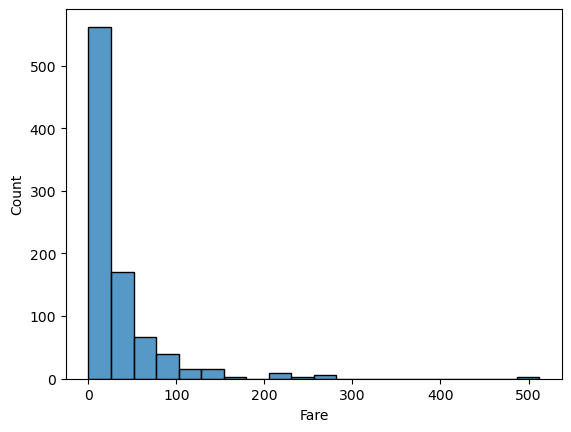

In [32]:
sns.histplot(data=df, x="Fare",bins=20) #bins es numero de columnas que acepta

<Axes: xlabel='Age', ylabel='Count'>

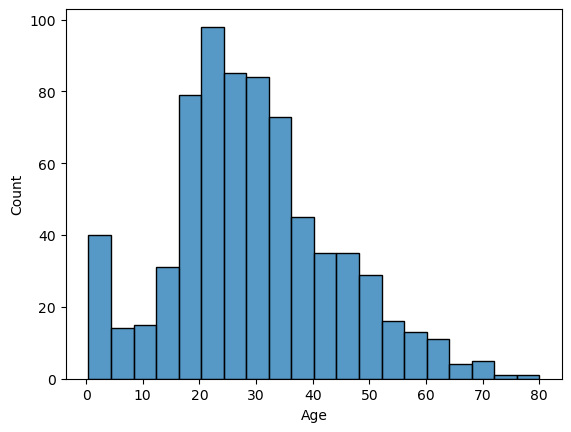

In [33]:
sns.histplot(data=df, x="Age",bins=20)

Histograma con bokeh

In [11]:
import numpy as np
from bokeh.io import show, output_file
from bokeh.io import show, output_notebook

output_notebook()

from bokeh.plotting import figure
data = df.Age.values

#omito datos nulos
data=data[~np.isnan(data)] # ~ (filtra todo menos lo que esta atras del ~)

#genero el histograma
hist, edges = np.histogram(data, density=True, bins=20)

#seteo el lienzo
p = figure(height=300,width=500, title='Histograma de edades')

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

#nombre de los ejes
p.xaxis.axis_label = "Edad"
p.yaxis.axis_label = "Frecuencia"

p.add_tools(HoverTool()) #interactivo
#output_file("hist.html")
show(p)

Loading BokehJS ...

NameError: name 'HoverTool' is not defined

In [39]:
data = df.Fare.values
#omiti los nulos
data=data[~np.isnan(data)]

#indico las columnas a evaluar, tipo de grafico
hist, edges = np.histogram(data, density=False, bins=20)


p = figure(height=300,width=500, title='Histograma de tarifas')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
p.xaxis.axis_label = "Tarifa (USD)"
p.yaxis.axis_label = "Frecuencia"
p.add_tools(HoverTool())
#output_file("hist.html")
show(p)

# LinePlot

In [41]:
data=pd.read_csv("C:\\Users\\VICTUS\\Documents\\2024\\DATA SCIENCE\\7. Uso de Graficos\\Time Series Data.csv") # Leer el archivo
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2019,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,5/19/2019,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,5/20/2019,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,5/21/2019,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,5/22/2019,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321


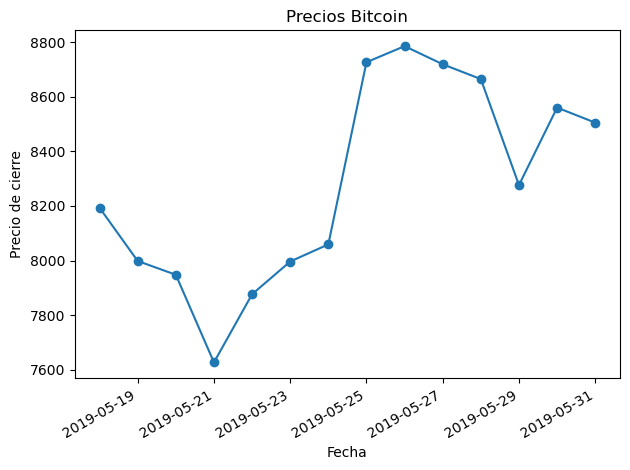

In [45]:
price_date= pd.to_datetime(data['Date'])
#price_date=data['Date'] # extraer dos vectores uno para la fecha
price_close=data['Close'] # extraer el precio de cierre en vector

plt.plot_date(price_date, price_close, linestyle='solid') # Graficar la serie de tiempo

plt.gcf().autofmt_xdate() # Darle formato fecha al eje x
plt.title('Precios Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')

plt.tight_layout() # Ajustar los ejes
plt.show() # mostrar la grafica

In [54]:
from bokeh.models import DatetimeTickFormatter
data.Date= pd.to_datetime(data.Date) # Convertir a Datetime

line_plot = figure(width=600, height=500, title='Line plot',
                   x_axis_label='Fecha', y_axis_label='Precio',x_axis_type='datetime')

line_plot.line(data.Date, data['Open'], legend_label='Open', line_width=2)
line_plot.line(data.Date, data['High'], legend_label='High', line_width=2,color='red')
line_plot.line(data.Date, data['Low'], legend_label='Low', line_width=2,color='green')
line_plot.line(data.Date, data['Close'], legend_label='Close', line_width=2,color='yellow')

#formateo como quiero que me aparezca en el eje x
line_plot.xaxis.formatter=DatetimeTickFormatter(
        hours=["%d %B %Y"],
        days=["%d %B %Y"],
        months=["%d %B %Y"],
        years=["%d %B %Y"])

line_plot.add_tools(HoverTool())
line_plot.legend.location = "top_left"
show(line_plot)

# Diagrama de Dispersion

Text(0, 0.5, 'Precio de apertura')

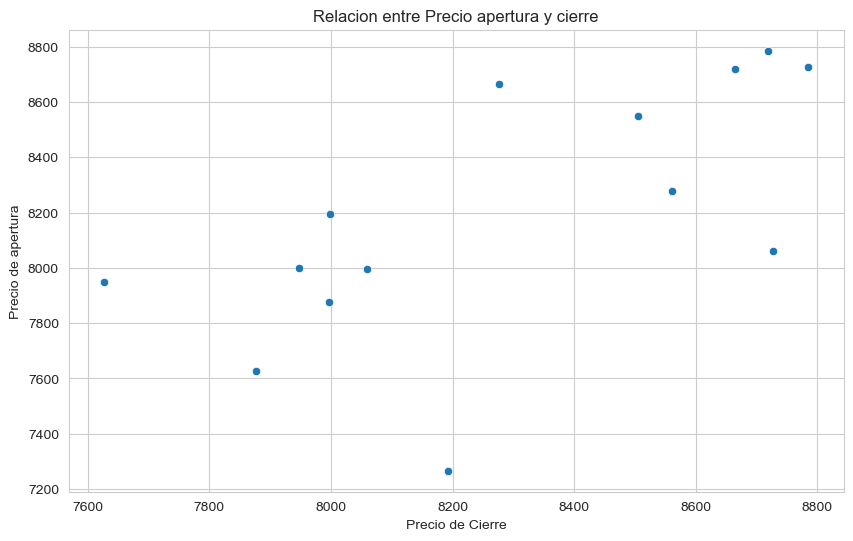

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Close, y= data.Open)
plt.title('Relacion entre Precio apertura y cierre')
plt.xlabel('Precio de Cierre')
plt.ylabel('Precio de apertura')

In [56]:
np.corrcoef(data.Close, data.Open)[0,1] #COEFICIENTE DE CORRELACION (vemos si dos variables son independientes)

0.6460061682850229

# BoxPlot

Text(0, 0.5, 'Tarifa')

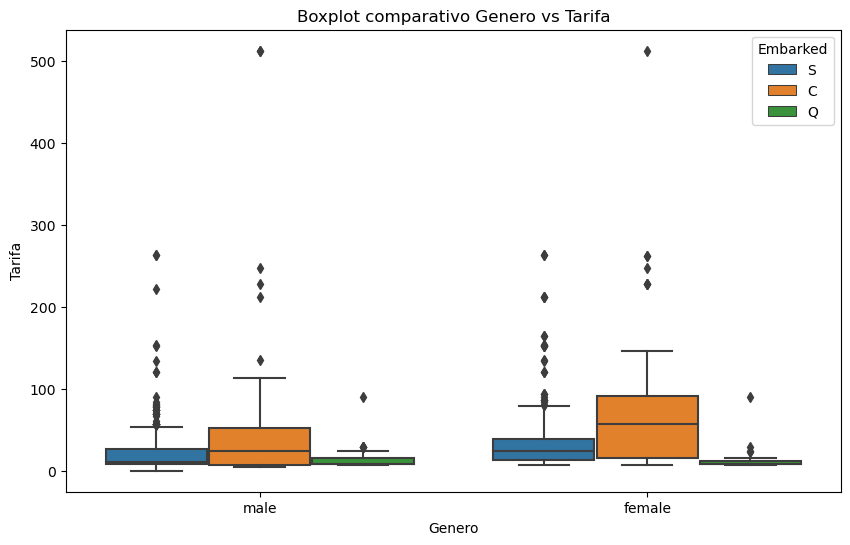

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Sex, y= df.Fare, hue=df.Embarked)
plt.title('Boxplot comparativo Genero vs Tarifa')
plt.xlabel('Genero')
plt.ylabel('Tarifa')